In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import calendar

In [2]:
data_df = pd.read_csv("..\project 4\SFPD_clean.csv")

In [4]:
filtered_data_df = data_df.filter(['Incident Datetime', 'Incident Day of Week', 'Incident Subcategory', 'Analysis Neighborhood', 'Intersection', 'Latitude', 'Longitude'], axis=1)
filtered_data_df['Incident Subcategory']=filtered_data_df['Incident Subcategory'].fillna('No cathegory')
filtered_data_df=filtered_data_df[filtered_data_df['Incident Subcategory'].str.contains("Vehicle")]   

In [8]:
filtered_data_df['Incident Datetime'] = pd.to_datetime(filtered_data_df['Incident Datetime'])


In [11]:
filtered_data_df['Incident hour'] = filtered_data_df['Incident Datetime'].apply(lambda x: x.hour)

In [12]:
filtered_data_df['Incident month'] = filtered_data_df['Incident Datetime'].apply(lambda x: x.month)

In [10]:

filtered_data_df['Incident Date'] = filtered_data_df['Incident Datetime'].dt.date

In [13]:
filtered_data_df=filtered_data_df.drop('Incident Datetime', axis =1)


In [14]:
hour_range_map = {
  0: "0-3",
  1: "4-7",
  2: "8-11",
  3: "12-15",
  4: "16-19",
  5: "20-23", 
}

In [15]:
filtered_data_df['hour_range'] = filtered_data_df['Incident hour'].apply(lambda x:hour_range_map[(int)(x/4)])

In [16]:
filtered_data_df.head()

,Incident Day of Week,Incident Subcategory,Analysis Neighborhood,Intersection,Latitude,Longitude,Incident Date,Incident hour,Incident month,hour_range
2,Saturday,Larceny - From Vehicle,NaN,NaN,NaN,NaN,2023-03-11,12,3,12-15
3,Monday,Larceny - From Vehicle,NaN,NaN,NaN,NaN,2023-03-13,11,3,8-11
5,Monday,Larceny - From Vehicle,NaN,NaN,NaN,NaN,2023-03-13,7,3,4-7
10,Saturday,Larceny - From Vehicle,NaN,NaN,NaN,NaN,2023-02-11,14,2,12-15
12,Thursday,Larceny - From Vehicle,NaN,NaN,NaN,NaN,2023-03-16,20,3,20-23


In [17]:
positive_df = filtered_data_df.filter(['Incident Date', 'Incident Day of Week', 'hour_range' , 'Analysis Neighborhood'], axis=1)


In [18]:
positive_df=positive_df.dropna()
positive_df['Incident occured'] =1
positive_df.head()

,Incident Date,Incident Day of Week,hour_range,Analysis Neighborhood,Incident occured
448,2021-09-06,Monday,4-7,Potrero Hill,1
1035,2021-10-11,Monday,12-15,Nob Hill,1
1157,2023-03-22,Wednesday,16-19,Mission,1
1159,2023-03-21,Tuesday,8-11,Inner Richmond,1
1166,2022-11-12,Saturday,16-19,Financial District/South Beach,1


In [19]:
positive_df.shape

(144517, 5)

In [20]:
len(positive_df['Analysis Neighborhood'].unique())

41

In [21]:
from datetime import date, datetime, timedelta

def datespan(startDate, endDate, delta=timedelta(days=1)):
    currentDate = startDate
    while currentDate < endDate:
        yield currentDate
        currentDate += delta

In [25]:
hour_range = []
date =[]
day=[]

for timestamp in datespan(datetime(2018, 1, 1, 0, 0), 
                          datetime(2020, 10, 27, 1, 0), 
                          delta=timedelta(hours=4)):
    x= hour_range_map[(int)((timestamp.hour)/4)]
    hour_range.append(x)
    date.append(timestamp.date())
    day.append(calendar.day_name[timestamp.date().weekday()])
 # print (x , timestamp.date(),calendar.day_name[timestamp.date().weekday()])
    
negative_df = pd.DataFrame({'Incident Date': date,'Incident Day of Week':day,'hour_range':hour_range})

In [26]:
negative_df['Incident occured'] =0
negative_df.head(20)

,Incident Date,Incident Day of Week,hour_range,Incident occured
0,2018-01-01,Monday,0-3,0
1,2018-01-01,Monday,4-7,0
2,2018-01-01,Monday,8-11,0
3,2018-01-01,Monday,12-15,0
4,2018-01-01,Monday,16-19,0
5,2018-01-01,Monday,20-23,0
6,2018-01-02,Tuesday,0-3,0
7,2018-01-02,Tuesday,4-7,0
8,2018-01-02,Tuesday,8-11,0
9,2018-01-02,Tuesday,12-15,0


In [27]:
neighborhood_list = positive_df['Analysis Neighborhood'].unique().tolist()

In [28]:
negative_data = pd.DataFrame()
for neighborhood in neighborhood_list:
    negative_df['Analysis Neighborhood'] = neighborhood
    negative_data = pd.concat([negative_data,negative_df])

In [29]:
on = ['Incident Date', 'Incident Day of Week', 'hour_range', 'Analysis Neighborhood']

negative_data = (negative_data.merge(positive_df[on], on=on, how='left', indicator=True)
              .query('_merge == "left_only"').drop('_merge', 1))

C:\Users\lulum\AppData\Local\Temp\ipykernel_6548\329048794.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  negative_data = (negative_data.merge(positive_df[on], on=on, how='left', indicator=True)


In [30]:
positive_df.shape

(144517, 5)

In [31]:
negative_data.shape 

(200453, 5)

In [32]:
data = pd.concat([positive_df,negative_data])

In [33]:
data = data.sort_values(['Incident Date', 'Analysis Neighborhood','hour_range'])

In [34]:
data.head(5)

,Incident Date,Incident Day of Week,hour_range,Analysis Neighborhood,Incident occured
248633,2018-01-01,Monday,0-3,Bayview Hunters Point,1
208816,2018-01-01,Monday,12-15,Bayview Hunters Point,1
271226,2018-01-01,Monday,12-15,Bayview Hunters Point,1
379505,2018-01-01,Monday,12-15,Bayview Hunters Point,1
117423,2018-01-01,Monday,16-19,Bayview Hunters Point,0


In [35]:
data=data.drop('Incident Date', axis =1)

In [36]:
len(data.columns)

4

In [37]:
data['Incident occured'] = data['Incident occured'].astype('category')

In [38]:
data = pd.concat([data,pd.get_dummies(data[['Incident Day of Week', 'hour_range', 'Analysis Neighborhood']], sparse=True)],axis=1)


In [39]:
data.drop(['Incident Day of Week', 'hour_range', 'Analysis Neighborhood'],axis=1,inplace=True)


In [40]:
label = data.pop('Incident occured')

In [41]:
data['Incident occured'] = label

In [42]:
data.head()

,Incident Day of Week_Friday,Incident Day of Week_Monday,Incident Day of Week_Saturday,Incident Day of Week_Sunday,Incident Day of Week_Thursday,Incident Day of Week_Tuesday,Incident Day of Week_Wednesday,hour_range_0-3,hour_range_12-15,hour_range_16-19,...,Analysis Neighborhood_Seacliff,Analysis Neighborhood_South of Market,Analysis Neighborhood_Sunset/Parkside,Analysis Neighborhood_Tenderloin,Analysis Neighborhood_Treasure Island,Analysis Neighborhood_Twin Peaks,Analysis Neighborhood_Visitacion Valley,Analysis Neighborhood_West of Twin Peaks,Analysis Neighborhood_Western Addition,Incident occured
248633,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
208816,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
271226,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
379505,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
117423,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
data.dtypes

Incident Day of Week_Friday                             Sparse[uint8, 0]
Incident Day of Week_Monday                             Sparse[uint8, 0]
Incident Day of Week_Saturday                           Sparse[uint8, 0]
Incident Day of Week_Sunday                             Sparse[uint8, 0]
Incident Day of Week_Thursday                           Sparse[uint8, 0]
Incident Day of Week_Tuesday                            Sparse[uint8, 0]
Incident Day of Week_Wednesday                          Sparse[uint8, 0]
hour_range_0-3                                          Sparse[uint8, 0]
hour_range_12-15                                        Sparse[uint8, 0]
hour_range_16-19                                        Sparse[uint8, 0]
hour_range_20-23                                        Sparse[uint8, 0]
hour_range_4-7                                          Sparse[uint8, 0]
hour_range_8-11                                         Sparse[uint8, 0]
Analysis Neighborhood_Bayview Hunters Point        

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

<Axes: >

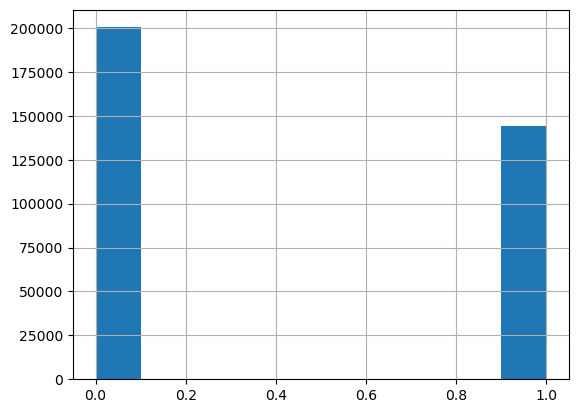

In [47]:
data['Incident occured'].hist()

In [48]:
data= data.sample(frac=1)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [49]:
X_train

,Incident Day of Week_Friday,Incident Day of Week_Monday,Incident Day of Week_Saturday,Incident Day of Week_Sunday,Incident Day of Week_Thursday,Incident Day of Week_Tuesday,Incident Day of Week_Wednesday,hour_range_0-3,hour_range_12-15,hour_range_16-19,...,Analysis Neighborhood_Russian Hill,Analysis Neighborhood_Seacliff,Analysis Neighborhood_South of Market,Analysis Neighborhood_Sunset/Parkside,Analysis Neighborhood_Tenderloin,Analysis Neighborhood_Treasure Island,Analysis Neighborhood_Twin Peaks,Analysis Neighborhood_Visitacion Valley,Analysis Neighborhood_West of Twin Peaks,Analysis Neighborhood_Western Addition
235580,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256750,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
25586,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249990,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189438,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173798,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110450,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116353,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111654,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

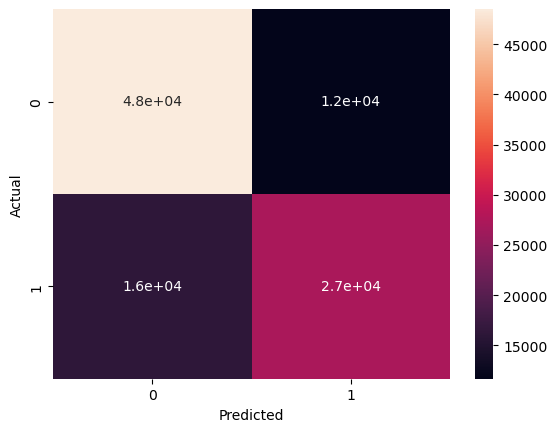

In [51]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [52]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.7309041365915877


In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

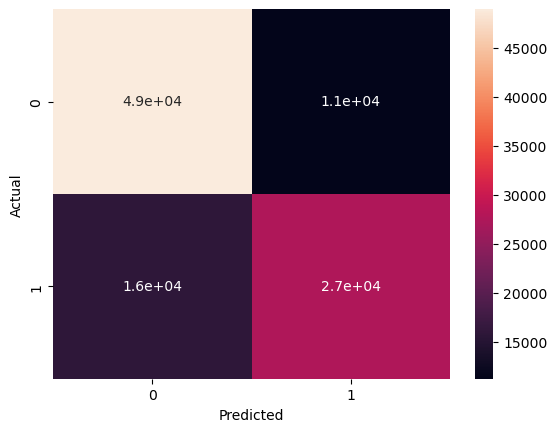

In [54]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


In [55]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.7379868780860172
